# Ebay Used Cars Dataset - Machine Learning Project

In [1]:
# import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [2]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# a global variable to enable or disable plots
global run_plots
run_plots = True

### Data Loading and Cleaning

In [4]:
# read the data
df = pd.read_csv('autos.csv', index_col='index')

In [5]:
df.shape

(371528, 20)

In [6]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
index,,,,,,,,,,,,,,,,,,,,
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-null  o

In [8]:
# percentage of missing data for each column
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

notRepairedDamage      19.395577
vehicleType            10.192771
fuelType                8.986133
model                   5.513447
gearbox                 5.439429
kilometer               0.000000
postalCode              0.000000
nrOfPictures            0.000000
dateCreated             0.000000
brand                   0.000000
monthOfRegistration     0.000000
dateCrawled             0.000000
name                    0.000000
powerPS                 0.000000
yearOfRegistration      0.000000
abtest                  0.000000
price                   0.000000
offerType               0.000000
seller                  0.000000
lastSeen                0.000000
dtype: float64

In [9]:
# fill the missing data with the most common value
for col in ['notRepairedDamage', 'vehicleType', 'fuelType', 'gearbox']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# fill missing data in model column with the value 'andere' which is the second most common value after 'golf'
df['model'].fillna('andere', inplace=True)

In [10]:
# number or missing data
df.isnull().sum().sum()

0

In [11]:
# statistical description of numeric columns
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [12]:
# droping the nrOfPictures columns since all values are zeros
df.drop('nrOfPictures', axis=1, inplace=True)

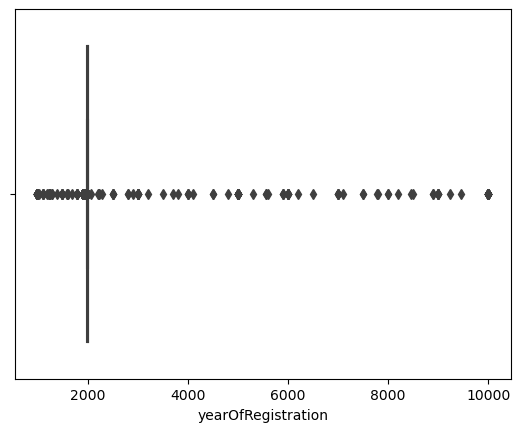

In [13]:
# visualize the yearOfRegistration column in a boxplot
if run_plots:
    sns.boxplot(x=df['yearOfRegistration'])
    plt.show()

In [14]:
# remove entries with invalid yearOfRegisteration (after 2019)
s = df.shape[0]
df = df[df['yearOfRegistration'] <= 2019]
print(f'{s - df.shape[0]} enrties removed')

114 enrties removed


In [15]:
# remove entries with invalid yearOfRegisteration (before 1920)
s = df.shape[0]
df = df[df['yearOfRegistration'] > 1920]
print(f'{s - df.shape[0]} enrties removed')

176 enrties removed


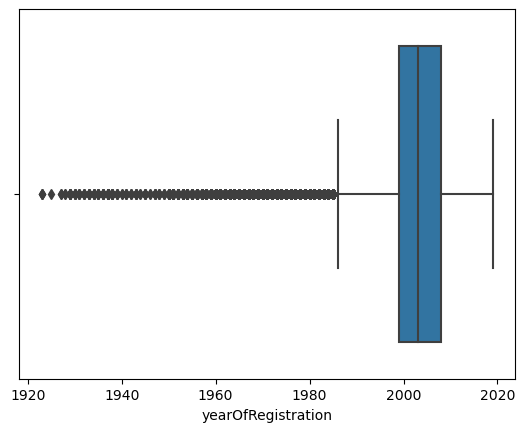

In [16]:
# visualize the yearOfRegistration column in a boxplot
if run_plots:
    sns.boxplot(x=df['yearOfRegistration'])
    plt.show()

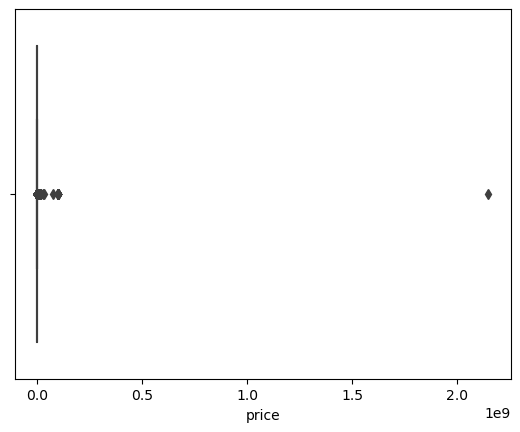

In [17]:
# visualize the price column in a boxplot
if run_plots:
    sns.boxplot(x=df['price'])
    plt.show()

Upon visual inspection of the price boxplot, it is evident that there are extreme values present. These outliers are causing the plot's range to expand significantly.

In [18]:
# the 5 most common car brands in the data
df['brand'].value_counts().head()

brand
volkswagen       79583
bmw              40254
opel             40109
mercedes_benz    35294
audi             32862
Name: count, dtype: int64

In [19]:
# remove cars where there is no model or brand
# 'sonstige_autos' means 'other_cars' in german

s = df.shape[0]
df = df[df['brand'] != 'sonstige_autos']
print(f'{s - df.shape[0]} enrties removed')

3905 enrties removed


In the upcoming section, our objective is to address the presence of extreme or invalid values within the dataset. Certain entries exhibit a price or power rating of zero. A straightforward elimination of these entries or outliers based solely on individual column values (such as price or power) could result in the loss of valuable data. This is due to the inherent variation in car brands, models, and registration years.

To circumvent this, we propose a strategy where cars are grouped based on their 'brand', 'model', and 'yearOfRegistration'. This allows us to gain a more nuanced understanding of each group's value distribution. Subsequently, we can replace any extreme or nonsensical values with the median value of their respective group. However, this approach is not applicable to groups containing only a single car, which will be removed from the dataset. This method ensures a more accurate and representative data cleaning process.

In [20]:
# show a sample of the data groups
df.sample(500, random_state=1).groupby(['brand', 'model', 'yearOfRegistration']).describe().head()

price                              \
                                     count    mean std     min     25%   
brand      model  yearOfRegistration                                     
alfa_romeo 159    2007                 1.0  7250.0 NaN  7250.0  7250.0   
                  2018                 1.0  4200.0 NaN  4200.0  4200.0   
           andere 2010                 1.0  6500.0 NaN  6500.0  6500.0   
audi       100    1989                 1.0  1300.0 NaN  1300.0  1300.0   
                  1994                 1.0  1350.0 NaN  1350.0  1350.0   

                                                             powerPS         \
                                         50%     75%     max   count   mean   
brand      model  yearOfRegistration                                          
alfa_romeo 159    2007                7250.0  7250.0  7250.0     1.0  150.0   
                  2018                4200.0  4200.0  4200.0     1.0  150.0   
           andere 2010                6500.0  6500.0  6500.0     1.0  120.0   
audi       100    1989                1300.0  1300.0  1300.0     1.0   90.0   
                  1994                1350.0  1350.0  1350.0     1.0  116.0   

                                      ... monthOfRegistration        \
                                      ...                 75%   max   
brand      model  yearOfRegistration  ...                             
alfa_romeo 159    2007                ...                 7.0   7.0   
                  2018                ...                 3.0   3.0   
           andere 2010                ...                10.0  10.0   
audi       100    1989                ...                10.0  10.0   
                  1994                ...                 8.0   8.0   

                                     postalCode                        \
                                          count     mean std      min   
brand      model  yearOfRegistration                                    
alfa_romeo 159    2007                      1.0  79426.0 NaN  79426.0   
                  2018                      1.0  68305.0 NaN  68305.0   
           andere 2010                      1.0  72275.0 NaN  72275.0   
audi       100    1989                      1.0  24803.0 NaN  24803.0   
                  1994                      1.0  65719.0 NaN  65719.0   

                                                                          
                                          25%      50%      75%      max  
brand      model  yearOfRegistration                                      
alfa_romeo 159    2007                79426.0  79426.0  79426.0  79426.0  
                  2018                68305.0  68305.0  68305.0  68305.0  
           andere 2010                72275.0  72275.0  72275.0  72275.0  
audi       100    1989                24803.0  24803.0  24803.0  24803.0  
                  1994                65719.0  65719.0  65719.0  65719.0  

[5 rows x 40 columns]

In [21]:
# remove groups where there are only a single car
grouped_data = df.groupby(['brand', 'model', 'yearOfRegistration'])
filtered_data = grouped_data.filter(lambda group: len(group) > 1)

print(f'{len(df)-len(filtered_data)} entries removed')

1084 entries removed


In [22]:
# update the data
df = filtered_data.copy()

In [23]:
# show a sample of the data groups
df.sample(500, random_state=1).groupby(['brand', 'model', 'yearOfRegistration']).describe().head(10)

price                                 \
                                     count     mean std      min      25%   
brand      model  yearOfRegistration                                        
alfa_romeo 147    2001                 1.0   1100.0 NaN   1100.0   1100.0   
                  2005                 1.0   4290.0 NaN   4290.0   4290.0   
           andere 1998                 1.0   1800.0 NaN   1800.0   1800.0   
audi       100    1992                 1.0   5250.0 NaN   5250.0   5250.0   
           80     1994                 1.0   2999.0 NaN   2999.0   2999.0   
           a1     2013                 1.0  15500.0 NaN  15500.0  15500.0   
                  2015                 1.0  19490.0 NaN  19490.0  19490.0   
           a3     1996                 1.0    499.0 NaN    499.0    499.0   
                  1999                 1.0   1450.0 NaN   1450.0   1450.0   
                  2000                 1.0   1150.0 NaN   1150.0   1150.0   

                                                                powerPS  \
                                          50%      75%      max   count   
brand      model  yearOfRegistration                                      
alfa_romeo 147    2001                 1100.0   1100.0   1100.0     1.0   
                  2005                 4290.0   4290.0   4290.0     1.0   
           andere 1998                 1800.0   1800.0   1800.0     1.0   
audi       100    1992                 5250.0   5250.0   5250.0     1.0   
           80     1994                 2999.0   2999.0   2999.0     1.0   
           a1     2013                15500.0  15500.0  15500.0     1.0   
                  2015                19490.0  19490.0  19490.0     1.0   
           a3     1996                  499.0    499.0    499.0     1.0   
                  1999                 1450.0   1450.0   1450.0     1.0   
                  2000                 1150.0   1150.0   1150.0     1.0   

                                             ... monthOfRegistration        \
                                       mean  ...                 75%   max   
brand      model  yearOfRegistration         ...                             
alfa_romeo 147    2001                102.0  ...                 0.0   0.0   
                  2005                120.0  ...                11.0  11.0   
           andere 1998                155.0  ...                 6.0   6.0   
audi       100    1992                230.0  ...                 0.0   0.0   
           80     1994                116.0  ...                10.0  10.0   
           a1     2013                122.0  ...                 5.0   5.0   
                  2015                143.0  ...                 1.0   1.0   
           a3     1996                125.0  ...                 7.0   7.0   
                  1999                 90.0  ...                 8.0   8.0   
                  2000                102.0  ...                10.0  10.0   

                                     postalCode                        \
                                          count     mean std      min   
brand      model  yearOfRegistration                                    
alfa_romeo 147    2001                      1.0  51503.0 NaN  51503.0   
                  2005                      1.0  24576.0 NaN  24576.0   
           andere 1998                      1.0  64739.0 NaN  64739.0   
audi       100    1992                      1.0  54290.0 NaN  54290.0   
           80     1994                      1.0  21033.0 NaN  21033.0   
           a1     2013                      1.0  89331.0 NaN  89331.0   
                  2015                      1.0  95473.0 NaN  95473.0   
           a3     1996                      1.0  80995.0 NaN  80995.0   
                  1999                      1.0  34121.0 NaN  34121.0   
                  2000                      1.0  35713.0 NaN  35713.0   

                                                                          
                   

After updating the data, there are still some extreme and nonsensical values that we need to get rid of. In the next cell we will remove cars where the price is less than 100.

In [24]:
%%time
def price_lessThan100_to_median(group):
    """
    This function replaces the price of cars in a group that are less than 100
    with the median price of that group.
    
    Parameters:
    group (DataFrame): A group of cars with the same brand, model, and year of registration.
    
    Returns:
    DataFrame: The input group with the price of cars less than 100 replaced by
    the median price of the group.
    """
    # Calculate the median price of the group
    median = group['price'].median()
    
    # Create a filter for cars with price less than 100
    fltr = (group['price'] < 100)
    
    # Replace the price of cars that satisfy the filter with the median price
    group.loc[fltr, 'price'] = median
    
    return group

# Define a lambda function to apply the price_lessThan100_to_median function
f = lambda x: price_lessThan100_to_median(x)

# Apply the function to each group of cars with the same brand, model, and year of registration
no_lessThan100_df = df.groupby(['brand', 'model',
                                'yearOfRegistration']).apply(f).reset_index(drop=True)

# Print the description of the price column before and after the operation
print(df['price'].describe(), '\n', no_lessThan100_df['price'].describe())


count    3.662490e+05
mean     1.045467e+04
std      6.193535e+05
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.100000e+03
max      1.000000e+08
Name: price, dtype: float64 
 count    3.662490e+05
mean     1.054859e+04
std      6.193531e+05
min      0.000000e+00
25%      1.200000e+03
50%      2.999000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
CPU times: total: 4.58 s
Wall time: 4.64 s


In [25]:
# update the data
df = no_lessThan100_df.copy()

In [26]:
%%time
def price_outOfRange_to_median(group):
    """
    This function replaces the price of cars in a group that are outside the
    5th to 95th percentile range with the median price of that group.
    
    Parameters:
    group (DataFrame): A group of cars with the same brand, model, and year of registration.
    
    Returns:
    DataFrame: The input group with the price of cars outside the
    5th to 95th percentile range replaced by the median price of the group.
    """
    # Calculate the 5th and 95th percentile of the price in the group
    lower = group['price'].quantile(0.05)
    upper = group['price'].quantile(0.95)
    
    # Calculate the median price of the group
    median = group['price'].median()
    
    # Create a filter for cars with price outside the 5th to 95th percentile range
    fltr = (group['price'] < lower) | (group['price'] > upper)
    
    # Replace the price of cars that satisfy the filter with the median price
    group.loc[fltr, 'price'] = median
    
    return group

# Define a lambda function to apply the price_outOfRange_to_median function
f = lambda x: price_outOfRange_to_median(x)

# Apply the function to each group of cars with the same brand, model, and year of registration
price_no_outOfRange_df = df.groupby(['brand', 'model',
                                     'yearOfRegistration']).apply(f).reset_index(drop=True)

# Print the description of the price column before and after the operation
print(df['price'].describe(), '\n', price_no_outOfRange_df['price'].describe())


count    3.662490e+05
mean     1.054859e+04
std      6.193531e+05
min      0.000000e+00
25%      1.200000e+03
50%      2.999000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64 
 count    366249.000000
mean       5544.677044
std        8285.459184
min           0.000000
25%        1250.000000
50%        2950.000000
75%        6999.000000
max      911911.000000
Name: price, dtype: float64
CPU times: total: 8.23 s
Wall time: 8.26 s


In [27]:
# update the data
df = price_no_outOfRange_df.copy()

In [28]:
%%time
def zeroPower_to_median(group):
    """
    This function replaces the power rating of cars in a group that are
    zero with the median power rating of that group.
    
    Parameters:
    group (DataFrame): A group of cars with the same brand, model, and year of registration.
    
    Returns:
    DataFrame: The input group with the power rating of cars that are
    zero replaced by the median power rating of the group.
    """
    # Calculate the median power rating of the group
    median = group['powerPS'].median()
    
    # Create a filter for cars with power rating equal to zero
    fltr = (group['powerPS'] == 0)
    
    # Replace the power rating of cars that satisfy the filter with the median power rating
    group.loc[fltr, 'powerPS'] = median
    
    return group

# Define a lambda function to apply the zeroPower_to_median function
f = lambda x: zeroPower_to_median(x)

# Apply the function to each group of cars with the same brand, model, and year of registration
no_zeroPower_df = df.groupby(['brand', 'model',
                              'yearOfRegistration']).apply(f).reset_index(drop=True)

# Print the description of the powerPS column before and after the operation
print(df['powerPS'].describe(), '\n', no_zeroPower_df['powerPS'].describe())


count    366249.000000
mean        115.536021
std         191.151661
min           0.000000
25%          71.000000
50%         105.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64 
 count    366249.000000
mean        125.614687
std         187.887582
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64
CPU times: total: 4.27 s
Wall time: 4.31 s


In [29]:
# update the data
df = no_zeroPower_df.copy()

In [30]:
%%time
def power_outOfRange_to_median(group):
    """
    This function replaces the power rating of cars in a group that are
    outside the 5th to 95th percentile range with the median power rating of that group.
    
    Parameters:
    group (DataFrame): A group of cars with the same brand, model, and year of registration.
    
    Returns:
    DataFrame: The input group with the power rating of cars outside the
    5th to 95th percentile range replaced by the median power rating of the group.
    """
    # Calculate the 5th and 95th percentile of the power rating in the group
    lower = group['powerPS'].quantile(0.05)
    upper = group['powerPS'].quantile(0.95)
    
    # Calculate the median power rating of the group
    median = group['powerPS'].median()
    
    # Create a filter for cars with power rating outside the 5th to 95th percentile range
    fltr = (group['powerPS'] < lower) | (group['powerPS'] > upper)
    
    # Replace the power rating of cars that satisfy the filter with the median power rating
    group.loc[fltr, 'powerPS'] = median
    
    return group

# Define a lambda function to apply the power_outOfRange_to_median function
f = lambda x: power_outOfRange_to_median(x)

# Apply the function to each group of cars with the same brand, model, and year of registration
power_no_outOfRange_power_df = df.groupby(['brand', 'model',
                                           'yearOfRegistration']).apply(f).reset_index(drop=True)

# Print the description of the powerPS column before and after the operation
print(df['powerPS'].describe(), '\n', power_no_outOfRange_power_df['powerPS'].describe())


count    366249.000000
mean        125.614687
std         187.887582
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64 
 count    366249.000000
mean        119.795276
std          56.383133
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max        3030.000000
Name: powerPS, dtype: float64
CPU times: total: 8.45 s
Wall time: 8.51 s


In [31]:
# update the data
df = power_no_outOfRange_power_df.copy()

##### Double click the plot to zoom in.

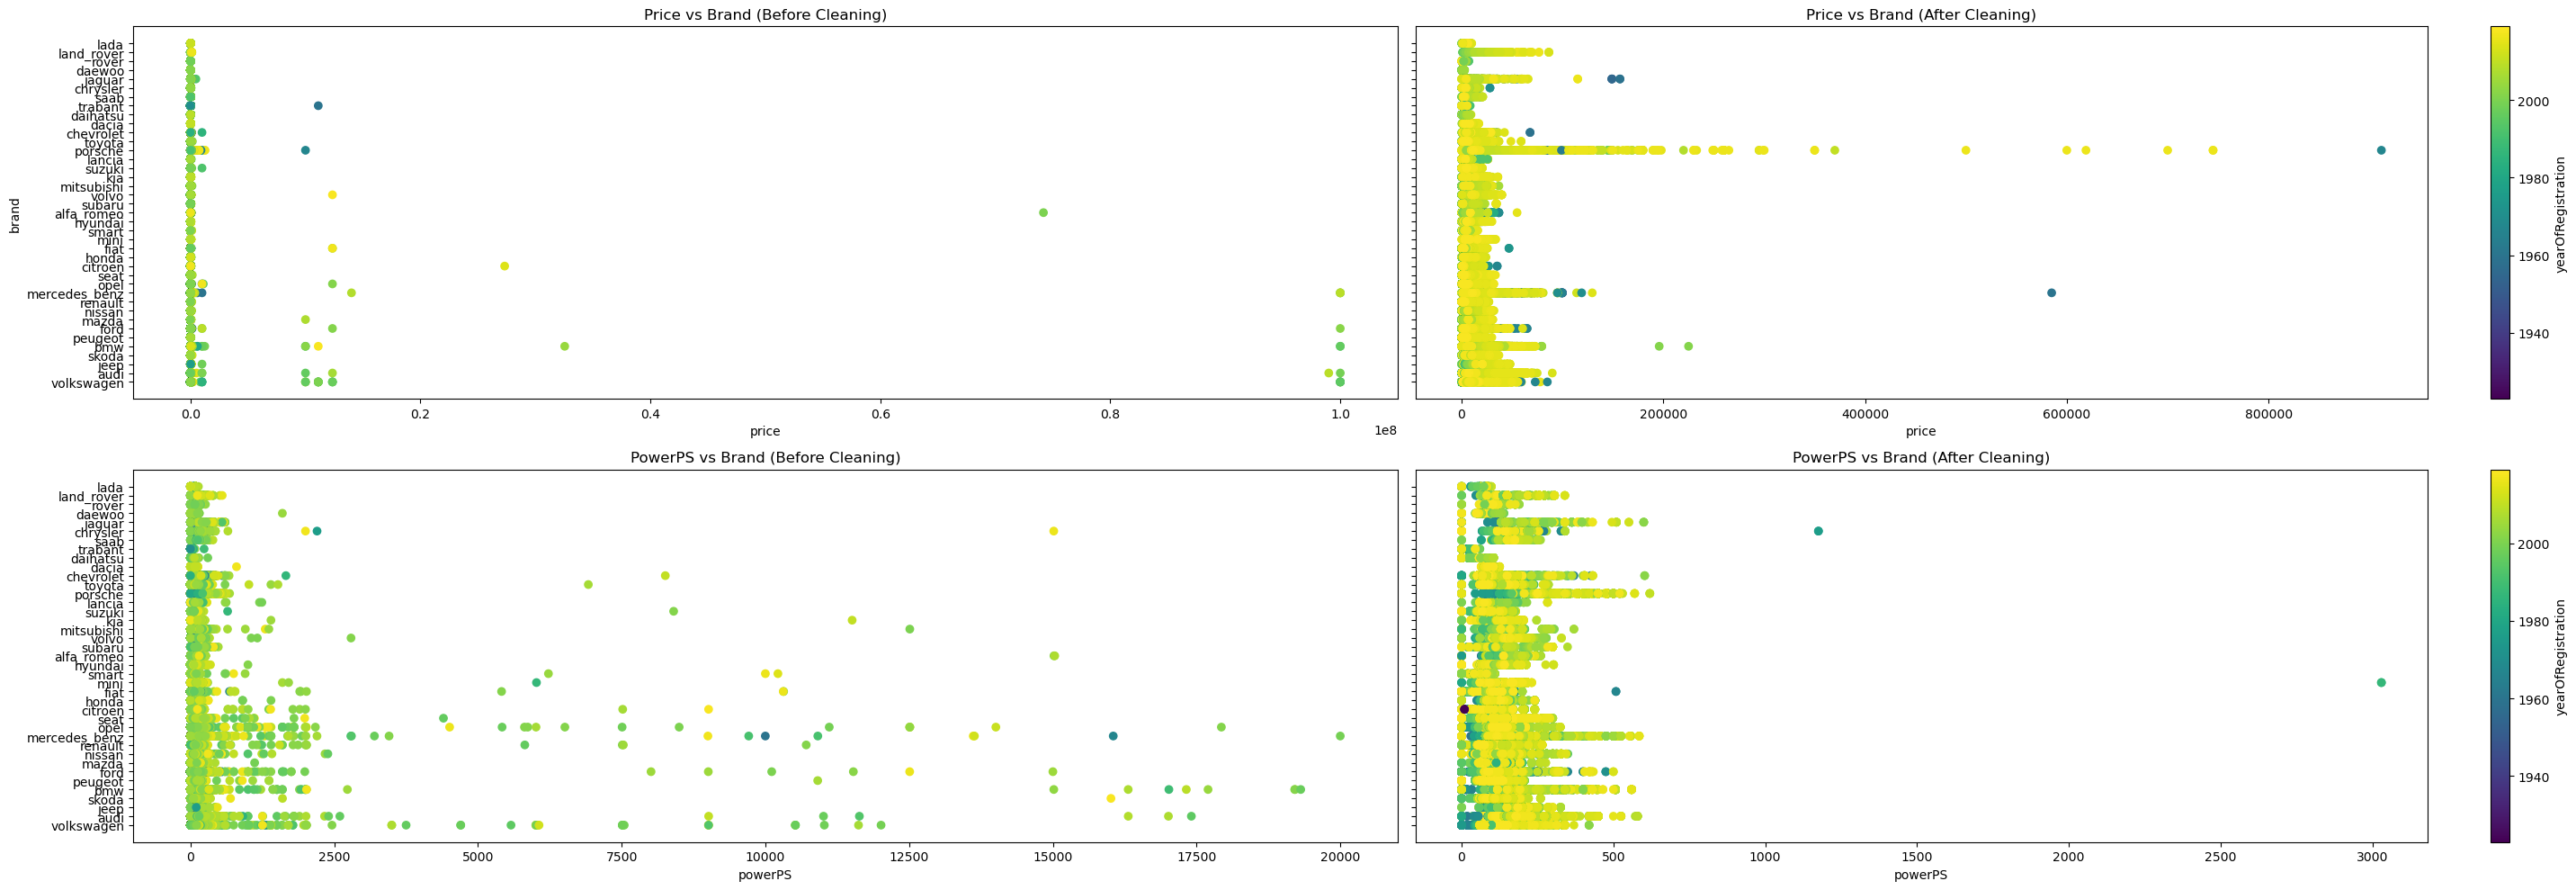

CPU times: total: 16.4 s
Wall time: 16.4 s


In [32]:
%%time
if run_plots:
    # Initialize a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(30, 10), sharey=True)

    # Plot price vs brand before removing extreme values
    axs[0, 0].scatter(filtered_data['price'], filtered_data['brand'],
                      c=filtered_data['yearOfRegistration'])
    axs[0, 0].set_xlabel('price')
    axs[0, 0].set_ylabel('brand')
    axs[0, 0].set_title('Price vs Brand (Before Cleaning)')

    # Plot price vs brand after removing extreme values
    scatter = axs[0, 1].scatter(df['price'], df['brand'], c=df['yearOfRegistration'])
    fig.colorbar(scatter, ax=axs[0, 1], label='yearOfRegistration')
    axs[0, 1].set_xlabel('price')
    axs[0, 1].set_title('Price vs Brand (After Cleaning)')

    # Plot powerPS vs brand before removing extreme values
    axs[1, 0].scatter(filtered_data['powerPS'], filtered_data['brand'],
                      c=filtered_data['yearOfRegistration'])
    axs[1, 0].set_xlabel('powerPS')
    axs[1, 0].set_title('PowerPS vs Brand (Before Cleaning)')

    # Plot powerPS vs brand after removing extreme values
    scatter = axs[1, 1].scatter(df['powerPS'], df['brand'], c=df['yearOfRegistration'])
    fig.colorbar(scatter, ax=axs[1, 1], label='yearOfRegistration')
    axs[1, 1].set_xlabel('powerPS')
    axs[1, 1].set_title('PowerPS vs Brand (After Cleaning)')

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()

Following the data cleansing process and the replacement of extreme values, we still observe some residual values that were not replaced. This could potentially be attributed to the majority, if not all, of the entries within a group possessing extreme and unrealistic values. Consequently, our next step will be to remove these remaining outliers.

Upon conducting a swift domain analysis, it is observed that the car brands and models present within our dataset do not exhibit a price exceeding 150,000 or a power rating surpassing 2000 horsepower. These thresholds have been established with a safety factor in mind, thereby accommodating potential legitimate variations such as car modifications.

In [33]:
# remove entries where price is zero or exceeding 150,000
s = len(df)
df = df[(df['price'] != 0) & (df['price'] <= 150000)]

# remove entries where the power rating is zero or exceeding 2000
df = df[(df['powerPS'] != 0) & (df['powerPS'] <= 2000)]
print(f'{s - len(df)} entries removed')

1868 entries removed


Replacing 0 variables in the column monthOfRegistration, with a random month

In [34]:
sorted(list(df['monthOfRegistration'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [35]:
f = lambda x: np.random.randint(1, 12) if x == 0 else x
df['monthOfRegistration'] = df['monthOfRegistration'].apply(f)

We can see that column 'dateCrawled' has the same date as column 'dateCreated' in addition to the time that the ad was crawled. So, we can drop the 'dateCreated' column as it is redunded

In [36]:
df.drop('dateCreated', axis=1, inplace=True)
df.head(1)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,lastSeen
0,2016-03-05 18:54:13,Alfa_Romeo_145_1_7_16V__idealles_Anfaenger_ode...,privat,Angebot,788.0,test,kleinwagen,1995,manuell,101.5,145,150000,1,benzin,alfa_romeo,nein,95469,2016-03-28 21:19:37


### Categorical Data Encoding and Feature Extraction

In this part, we will encode the columns that contain categorical data into numerical values and extact useful features so we can use them in our model

After playing around with the features, I found out a few things:

- Some features, like the 'model' column, don't make much sense on their own. For example, knowing a car's model doesn't tell you much unless you also know the car's brand. So, I stuck them together into one feature.
- The price of a car can change a lot depending on the year it was registered. So, it might be helpful to mix the year with other features.
- I thought we could create new features by pairing or mixing existing ones. It turns out that these mixed features are strongly linked with the target variable.
- I looked at which features have the strongest link with the target variable and made more mixed features. For example, I mixed more than 2 features together like car brand, model, year, and kilometer.

When combining and encoding features, especially continuous ones like power rating, we end up with a lot of different combinations. To manage this, I grouped similar values together into bins. This way, we have fewer unique values, but we still keep the important information.

In [37]:
power_min, power_max = df['powerPS'].min(), df['powerPS'].max()
print(power_min, power_max)
bin_size = 5

0.75 1175.5


In [38]:
# Create bins from 'power_min' to 'power_max' with a step size of 'bin_size'
bins = np.arange(power_min, power_max, bin_size)

# Use the right edge of each bin as labels
labels = bins[1:]

# Bin 'powerPS' values and store them in a new column 'powerPS_binned'
df['powerPS_binned'] = pd.cut(df['powerPS'], bins=bins, labels=labels, include_lowest=True)


In [39]:
# Define the features to combine
features_to_combine = ['brand', 'model', 'yearOfRegistration', 'powerPS_binned', 'kilometer', 'vehicleType', 'gearbox']

# Initialize an empty list and DataFrame to store the combined features
extracted_Features_list = []
extractedFeatures_df = pd.DataFrame()

In [40]:
# Loop over each pair of features
for feature1 in features_to_combine:
    for feature2 in features_to_combine:
        # Skip if the features are the same
        if feature1 != feature2:
            # Combine the features and add them to the DataFrame
            feature_to_add = df[feature1].astype(str) + '_' + df[feature2].astype(str)
            feature_name = feature1 + '_' + feature2
            feature_name_reversed = feature2 + '_' + feature1
            
            # Check if the combined feature is already added
            if (feature_name not in extracted_Features_list) and (feature_name_reversed not in extracted_Features_list):
                extracted_Features_list.append(feature_name)
                extractedFeatures_df = pd.concat([extractedFeatures_df, feature_to_add], axis=1)

# Set the column names of the DataFrame
extractedFeatures_df.columns = extracted_Features_list

# Print the info of the DataFrame
print(extractedFeatures_df.info())

# Display the first few rows of the DataFrame
extractedFeatures_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 364381 entries, 0 to 366248
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   brand_model                        364381 non-null  object
 1   brand_yearOfRegistration           364381 non-null  object
 2   brand_powerPS_binned               364381 non-null  object
 3   brand_kilometer                    364381 non-null  object
 4   brand_vehicleType                  364381 non-null  object
 5   brand_gearbox                      364381 non-null  object
 6   model_yearOfRegistration           364381 non-null  object
 7   model_powerPS_binned               364381 non-null  object
 8   model_kilometer                    364381 non-null  object
 9   model_vehicleType                  364381 non-null  object
 10  model_gearbox                      364381 non-null  object
 11  yearOfRegistration_powerPS_binned  364381 non-null  objec

,brand_model,brand_yearOfRegistration,brand_powerPS_binned,brand_kilometer,brand_vehicleType,brand_gearbox,model_yearOfRegistration,model_powerPS_binned,model_kilometer,model_vehicleType,...,yearOfRegistration_powerPS_binned,yearOfRegistration_kilometer,yearOfRegistration_vehicleType,yearOfRegistration_gearbox,powerPS_binned_kilometer,powerPS_binned_vehicleType,powerPS_binned_gearbox,kilometer_vehicleType,kilometer_gearbox,vehicleType_gearbox
0,alfa_romeo_145,alfa_romeo_1995,alfa_romeo_105.75,alfa_romeo_150000,alfa_romeo_kleinwagen,alfa_romeo_manuell,145_1995,145_105.75,145_150000,145_kleinwagen,...,1995_105.75,1995_150000,1995_kleinwagen,1995_manuell,105.75_150000,105.75_kleinwagen,105.75_manuell,150000_kleinwagen,150000_manuell,kleinwagen_manuell
1,alfa_romeo_145,alfa_romeo_1995,alfa_romeo_105.75,alfa_romeo_150000,alfa_romeo_kleinwagen,alfa_romeo_manuell,145_1995,145_105.75,145_150000,145_kleinwagen,...,1995_105.75,1995_150000,1995_kleinwagen,1995_manuell,105.75_150000,105.75_kleinwagen,105.75_manuell,150000_kleinwagen,150000_manuell,kleinwagen_manuell
2,alfa_romeo_145,alfa_romeo_1995,alfa_romeo_105.75,alfa_romeo_150000,alfa_romeo_limousine,alfa_romeo_manuell,145_1995,145_105.75,145_150000,145_limousine,...,1995_105.75,1995_150000,1995_limousine,1995_manuell,105.75_150000,105.75_limousine,105.75_manuell,150000_limousine,150000_manuell,limousine_manuell
3,alfa_romeo_145,alfa_romeo_1995,alfa_romeo_100.75,alfa_romeo_100000,alfa_romeo_andere,alfa_romeo_manuell,145_1995,145_100.75,145_100000,145_andere,...,1995_100.75,1995_100000,1995_andere,1995_manuell,100.75_100000,100.75_andere,100.75_manuell,100000_andere,100000_manuell,andere_manuell
4,alfa_romeo_145,alfa_romeo_1996,alfa_romeo_90.75,alfa_romeo_100000,alfa_romeo_kleinwagen,alfa_romeo_manuell,145_1996,145_90.75,145_100000,145_kleinwagen,...,1996_90.75,1996_100000,1996_kleinwagen,1996_manuell,90.75_100000,90.75_kleinwagen,90.75_manuell,100000_kleinwagen,100000_manuell,kleinwagen_manuell


In [41]:
# create a copy of the dataframe before updating it
dfo = df.copy()

In [42]:
# uncomment this line to retrieve the original dataframe if needed
# df = dfo.copy()

In the next cell, I add 6 more features that were found to highly correlate with the price

In [43]:
extractedFeatures_df['brand_model_yearOfRegistration'] = df['brand'].astype(str)\
+ '_' + df['model'].astype(str) + '_' + df['yearOfRegistration'].astype(str)

extractedFeatures_df['brand_model_kilometer'] = df['brand'].astype(str)\
+ '_' + df['model'].astype(str) + '_' + df['kilometer'].astype(str)

extractedFeatures_df['brand_model_powerPS_binned'] = df['brand'].astype(str)\
+ '_' + df['model'].astype(str) + '_' + df['powerPS_binned'].astype(str)

extractedFeatures_df['brand_model_yearOfRegistration_kilometer'] = df['brand'].astype(str)\
+ '_' + df['model'].astype(str) + '_' + df['yearOfRegistration'].astype(str)\
+ '_' + df['kilometer'].astype(str)

extractedFeatures_df['brand_model_yearOfRegistration_powerPS_binned'] = df['brand'].astype(str)\
+ '_' + df['model'].astype(str) + '_' + df['yearOfRegistration'].astype(str)\
+ '_' + df['powerPS_binned'].astype(str)

extractedFeatures_df['brand_model_kilometer_powerPS_binned'] = df['brand'].astype(str)\
+ '_' + df['model'].astype(str) + '_' + df['kilometer'].astype(str)\
+ '_' + df['powerPS_binned'].astype(str)

In [44]:
# add the extracted features to our dataframe
df = pd.concat([df, extractedFeatures_df], axis=1)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,powerPS_binned_gearbox,kilometer_vehicleType,kilometer_gearbox,vehicleType_gearbox,brand_model_yearOfRegistration,brand_model_kilometer,brand_model_powerPS_binned,brand_model_yearOfRegistration_kilometer,brand_model_yearOfRegistration_powerPS_binned,brand_model_kilometer_powerPS_binned
0,2016-03-05 18:54:13,Alfa_Romeo_145_1_7_16V__idealles_Anfaenger_ode...,privat,Angebot,788.0,test,kleinwagen,1995,manuell,101.5,...,105.75_manuell,150000_kleinwagen,150000_manuell,kleinwagen_manuell,alfa_romeo_145_1995,alfa_romeo_145_150000,alfa_romeo_145_105.75,alfa_romeo_145_1995_150000,alfa_romeo_145_1995_105.75,alfa_romeo_145_150000_105.75
1,2016-03-28 10:53:51,Alfa_Romeo_145,privat,Angebot,794.0,control,kleinwagen,1995,manuell,103.0,...,105.75_manuell,150000_kleinwagen,150000_manuell,kleinwagen_manuell,alfa_romeo_145_1995,alfa_romeo_145_150000,alfa_romeo_145_105.75,alfa_romeo_145_1995_150000,alfa_romeo_145_1995_105.75,alfa_romeo_145_150000_105.75
2,2016-03-08 16:46:01,Alfa_Romeo_145_1.4,privat,Angebot,800.0,test,limousine,1995,manuell,101.5,...,105.75_manuell,150000_limousine,150000_manuell,limousine_manuell,alfa_romeo_145_1995,alfa_romeo_145_150000,alfa_romeo_145_105.75,alfa_romeo_145_1995_150000,alfa_romeo_145_1995_105.75,alfa_romeo_145_150000_105.75
3,2016-03-08 18:43:30,Kaufe_ihr_Auto_an_zahle_bis_500_Euro_mit_TÜV,privat,Angebot,794.0,test,andere,1995,manuell,100.0,...,100.75_manuell,100000_andere,100000_manuell,andere_manuell,alfa_romeo_145_1995,alfa_romeo_145_100000,alfa_romeo_145_100.75,alfa_romeo_145_1995_100000,alfa_romeo_145_1995_100.75,alfa_romeo_145_100000_100.75
4,2016-03-28 20:51:02,Alfa_Romeo_145_1_6L_Boxer___Bastler/Teiletraeger,privat,Angebot,275.0,control,kleinwagen,1996,manuell,86.0,...,90.75_manuell,100000_kleinwagen,100000_manuell,kleinwagen_manuell,alfa_romeo_145_1996,alfa_romeo_145_100000,alfa_romeo_145_90.75,alfa_romeo_145_1996_100000,alfa_romeo_145_1996_90.75,alfa_romeo_145_100000_90.75


This part explains how the following functions work to encode the variables

- The `listCategoricalColumns` function returns a list of column names from a DataFrame that are categorical (object type) and have a number of unique values less than or equal to a specified limit.

- The `uniqueListAscended` function returns a list of unique values from a specified column in a DataFrame, sorted in ascending order by the mean of a target column.

- The `encodeColumn` function encodes a column in a DataFrame using ordinal encoding and returns a tuple where the first element is a Series with the encoded column and the second element is a dictionary mapping the original values to their encoded values.

- Lastly, the `encodeCategoricalColumns` function encodes all categorical columns in a DataFrame using ordinal encoding and returns a tuple where the first element is a DataFrame with the encoded columns and the second element is a dictionary mapping the original column names to their encoding dictionaries.

In [45]:
def listCategoricalColumns(df, maxNumOfUniqueValues=10):
    """
    Returns a list of column names from a DataFrame that are categorical (object type) and have a number of unique values less than or equal to maxNumOfUniqueValues.

    Parameters:
    df (pandas.DataFrame): The DataFrame to analyze.
    maxNumOfUniqueValues (int): The maximum number of unique values a column can have to be considered categorical. Default is 10.

    Returns:
    list: A list of column names that are categorical.
    """
    categorical_columns = df.select_dtypes(include=['object']).columns
    filtered_columns = [col for col in categorical_columns if df[col].nunique() <= maxNumOfUniqueValues]
    return filtered_columns

In [46]:
def uniqueListAscended(df, column, target='price'):
    """
    Returns a list of unique values from a specified column in a DataFrame, sorted in ascending order by the mean of a target column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to analyze.
    column (str): The column from which to get unique values.
    target (str): The target column to calculate means for sorting. Default is 'price'.

    Returns:
    list: A list of unique values from the specified column, sorted by the mean of the target column.
    """
    return list(df.groupby(column)[target].mean().sort_values().reset_index()[column])

In [47]:
def encodeColumn(df, column):
    """
    Encodes a column in a DataFrame using ordinal encoding.

    Parameters:
    df (pandas.DataFrame): The DataFrame to analyze.
    column (str): The column to encode.

    Returns:
    tuple: A tuple where the first element is a Series with the encoded column and the second element is a dictionary mapping the original values to their encoded values.
    """
    unique_values_array = df[column].unique()
    keys = uniqueListAscended(df, column)
    values = list(range(unique_values_array.size))
    encoding_dict = dict(zip(keys, values))
    return (df[column].map(encoding_dict), encoding_dict)

In [48]:
def encodeCategoricalColumns(df, maxNumOfUniqueValues):
    """
    Encodes all categorical columns in a DataFrame using ordinal encoding.

    Parameters:
    df (pandas.DataFrame): The DataFrame to analyze.

    Returns:
    tuple: A tuple where the first element is a DataFrame with the encoded columns and the second element is a dictionary mapping the original column names to their encoding dictionaries.
    """
    dictionary = {}
    df_out = pd.DataFrame()
    for column in listCategoricalColumns(df, maxNumOfUniqueValues):
        out = encodeColumn(df, column)
        df_out = pd.concat([df_out, out[0]], axis=1)
        df_out.rename(columns={column: (column+'_encoded')}, inplace=True)
        dictionary[column] = out[1]
    return (df_out, dictionary)

In [49]:
# encode the dataframe
encoded_df, encoding_dict = encodeCategoricalColumns(df, extractedFeatures_df.nunique().max())

In [50]:
# uncomment this to take a look at the encoding dictionary
# encoding_dict

In [51]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364381 entries, 0 to 366248
Data columns (total 36 columns):
 #   Column                                                 Non-Null Count   Dtype
---  ------                                                 --------------   -----
 0   seller_encoded                                         364381 non-null  int64
 1   offerType_encoded                                      364381 non-null  int64
 2   abtest_encoded                                         364381 non-null  int64
 3   vehicleType_encoded                                    364381 non-null  int64
 4   gearbox_encoded                                        364381 non-null  int64
 5   model_encoded                                          364381 non-null  int64
 6   fuelType_encoded                                       364381 non-null  int64
 7   brand_encoded                                          364381 non-null  int64
 8   notRepairedDamage_encoded                              3643

Now, we have all the categorical columns in the data encoded into numerical values

We're adding a new column to our data. This column shows how long an Ad was up. We find this by looking at when the Ad was first found and when it was last seen. We then change this time difference into hours.

In [52]:
encoded_df['timeAdWasUp(hours)'] = pd.to_datetime(df['lastSeen']) - pd.to_datetime(df['dateCrawled'])
encoded_df['timeAdWasUp(hours)'] = encoded_df['timeAdWasUp(hours)'].dt.total_seconds() / 3600

In [53]:
encoded_df[['timeAdWasUp(hours)']].head()

,timeAdWasUp(hours)
0,554.423333
1,218.849167
2,704.528889
3,81.035833
4,222.892222


Up until this point, we have removed useless columns, cleaned the numerical ones, encoded the categorical ones into numerical values and converted the time columns into simple time difference format.

We are doing with the pre-processing part. Now we can start building our models and evaluting them.

### Building the model

In [54]:
# Select numerical features for the model
X = df[df.select_dtypes(include=['int64', 'float64']).columns]

# Remove the target variable 'price' from the features
X = X.drop('price', axis=1)

# Add encoded features to the model
X = pd.concat([X, encoded_df], axis=1)

# Set 'price' as the target variable
Y = df['price']

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364381 entries, 0 to 366248
Data columns (total 42 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   yearOfRegistration                                     364381 non-null  int64  
 1   powerPS                                                364381 non-null  float64
 2   kilometer                                              364381 non-null  int64  
 3   monthOfRegistration                                    364381 non-null  int64  
 4   postalCode                                             364381 non-null  int64  
 5   seller_encoded                                         364381 non-null  int64  
 6   offerType_encoded                                      364381 non-null  int64  
 7   abtest_encoded                                         364381 non-null  int64  
 8   vehicleType_encoded                    

In [56]:
# uncomment this code to create a scatter plot for every variable against the price

# if run_plots:
#     for col in X.columns:
#         plt.figure(figsize=(8, 3))
#         sns.scatterplot(x=X[col], y=Y)
#         plt.title(f'Price vs {col}')
#         plt.show()

In [57]:
# create a correlation dataframe
corr_df = pd.concat([X, Y], axis=1).corr()

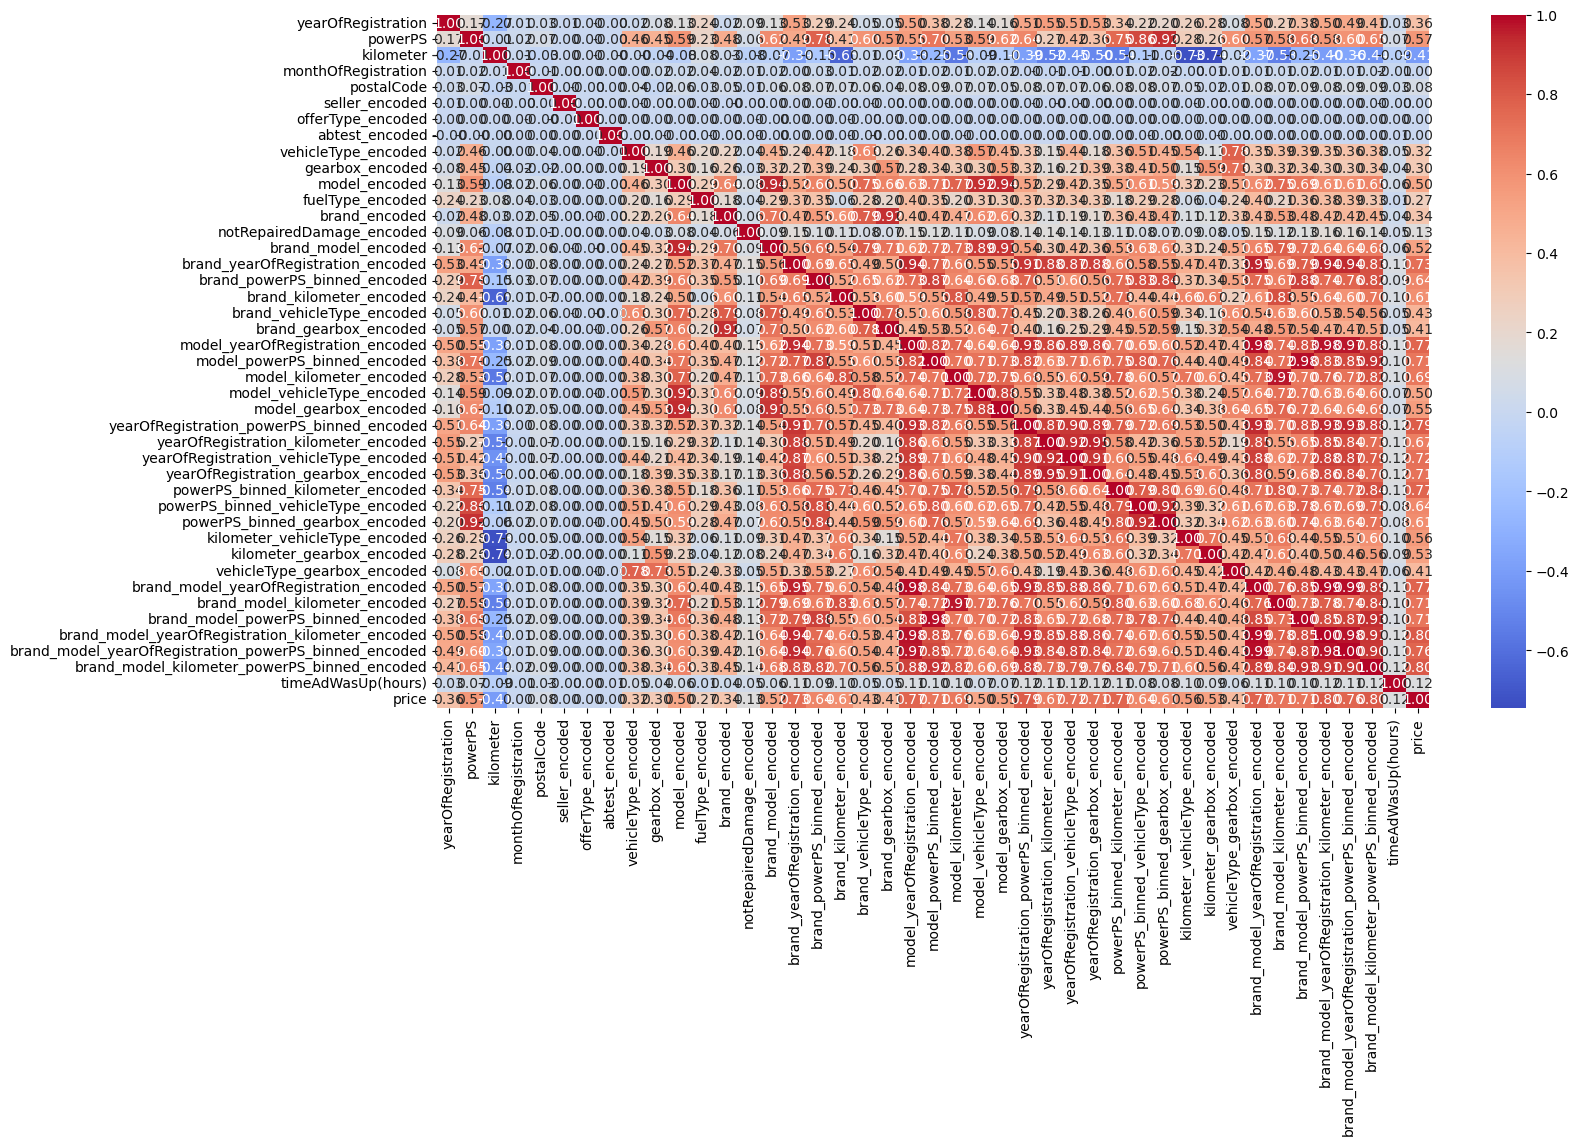

kilometer                                                0.406913
seller_encoded                                           0.001037
monthOfRegistration                                      0.001184
offerType_encoded                                        0.001643
abtest_encoded                                           0.001748
postalCode                                               0.078581
timeAdWasUp(hours)                                       0.120641
notRepairedDamage_encoded                                0.132920
fuelType_encoded                                         0.265279
gearbox_encoded                                          0.301984
vehicleType_encoded                                      0.321163
brand_encoded                                            0.336936
yearOfRegistration                                       0.363883
vehicleType_gearbox_encoded                              0.405236
brand_gearbox_encoded                                    0.410137
brand_vehi

In [58]:
# This code block generates a heatmap of the correlation matrix of the features
# and target variable
# It also shows the absolute correlation coeffecients  of variables with the price
if run_plots:
    plt.figure(figsize=(16, 9))
    sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm')
    plt.show()
    
    print(abs(corr_df.sort_values('price')['price']))

Upon visual examination of the heatmap, it's clear that the variables - monthOfRegistration, postalCode, seller_encoded, offerType_encoded, abtest_encoded, 'timeAdWasUp(hours)' and 'notRepairedDamage_encoded'- exhibit little to no correlation with any other variable or the target variable, which is 'price'. So, we ought to remove them from the features set.

In [59]:
X.drop(['monthOfRegistration', 'postalCode',
        'seller_encoded', 'offerType_encoded', 'abtest_encoded', 
        'timeAdWasUp(hours)', 'notRepairedDamage_encoded'], axis=1, inplace=True)

We also drop the features with a correlation less than 0.5; to make the model more simple and faster

In [60]:
# create an updated correlation dataframe
corr_df = pd.concat([X, Y], axis=1).corr()

In [61]:
# We drop the features with a correlation less than 0.5; to make the model more simple and faster
corr_ser = corr_df.sort_values('price')['price']
corr_ser = corr_ser[abs(corr_ser) < 0.5]
corr_list = list(corr_ser.index)

s = X.shape[1]
X.drop(corr_list, axis=1, inplace=True)
print(f'{s - X.shape[1]} features dropped')

9 features dropped


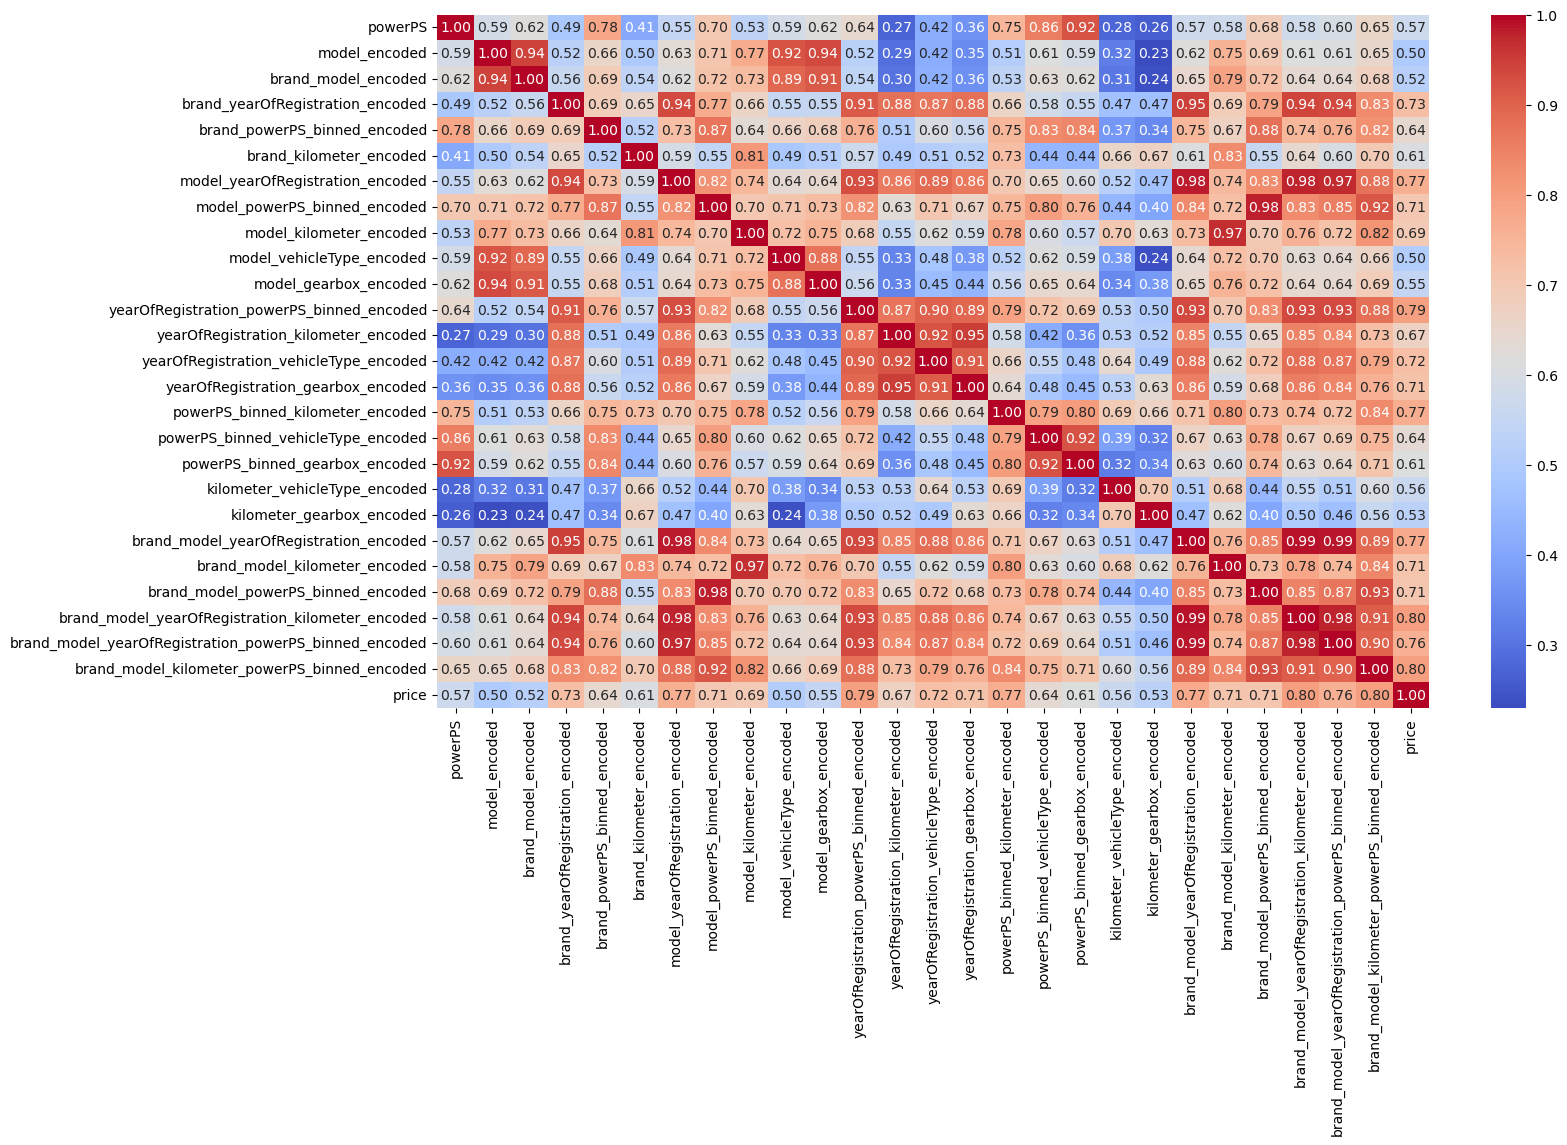

In [62]:
# Show an updated correlation heatmap
if run_plots:
    corr_df = pd.concat([X, Y], axis=1).corr()
    plt.figure(figsize=(16, 9))
    sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm')
    plt.show()

In [63]:
# import the needed libraries for the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

We start by splitting the dataset into training and testing sets, standardizing the data and building a multivariate 1st order liner regression model

In [64]:
%%time
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Standardize the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train a linear regression model
lm = LinearRegression()
lm.fit(x_train, y_train)

# Make predictions on the test set
y_hat = lm.predict(x_test)

# Print the R-squared, MAE, and MSE
print(f'r2 : {r2_score(y_test, y_hat)}\
\nMAE: {mean_absolute_error(y_test, y_hat)}\
\nMSE: {mean_squared_error(y_test, y_hat)}\n')

r2 : 0.7254828145911244
MAE: 2001.6709055573274
MSE: 14155854.442200722

CPU times: total: 422 ms
Wall time: 380 ms


Then, we create polynomial features and try a 2nd order polynomial regression model

In [65]:
%%time
# Create a PolynomialFeatures object for 2nd degree polynomial
pr_2nd = PolynomialFeatures(2)

# Transform the training and testing data to 2nd degree polynomial features
pr_x_train_2nd = pr_2nd.fit_transform(x_train)
pr_x_test_2nd  = pr_2nd.transform(x_test)

# Train a linear regression model on the polynomial features
lm_pr_2nd = LinearRegression()
lm_pr_2nd.fit(pr_x_train_2nd, y_train)

# Make predictions on the test set
pr_y_hat_2nd = lm_pr_2nd.predict(pr_x_test_2nd)

# Print the R-squared, MAE, and MSE
print(f'r2 : {r2_score(y_test, pr_y_hat_2nd)}\
\nMAE: {mean_absolute_error(y_test, pr_y_hat_2nd)}\
\nMSE: {mean_squared_error(y_test, pr_y_hat_2nd)}\n')

r2 : 0.8822705868898777
MAE: 1251.6707428894965
MSE: 6070878.342535733

CPU times: total: 28.1 s
Wall time: 5.56 s


Try a 3rd order polynomial regression model

In [66]:
%%time
# Create a PolynomialFeatures object for 3rd degree polynomial
pr_3rd = PolynomialFeatures(3)

# Transform the training and testing data to 3rd degree polynomial features
pr_x_train_3rd = pr_3rd.fit_transform(x_train)
pr_x_test_3rd  = pr_3rd.transform(x_test)

# Train a linear regression model on the polynomial features
lm_pr_3rd = LinearRegression()
lm_pr_3rd.fit(pr_x_train_3rd, y_train)

# Make predictions on the test set
pr_y_hat_3rd = lm_pr_3rd.predict(pr_x_test_3rd)

# Print the R-squared, MAE, and MSE
print(f'r2 : {r2_score(y_test, pr_y_hat_3rd)}\
\nMAE: {mean_absolute_error(y_test, pr_y_hat_3rd)}\
\nMSE: {mean_squared_error(y_test, pr_y_hat_3rd)}\n')

r2 : 0.9181669102200363
MAE: 1031.8729956702548
MSE: 4219835.292844496

CPU times: total: 13min 9s
Wall time: 3min 16s


Let's try using ridge regression to reduce the complexity of the model and avoid overfitting, then see if we get better score. We will try different alpha values to find the optimum one.

In [67]:
%%time
# Initialize an empty dictionary to store the results of the Ridge models
ridge_models_results = {}

# Define a range of powers for the alpha value in the Ridge model
power_range = range(-5, 5)

# Loop over the power range
for power in power_range:
    # Calculate the alpha value as 10 raised to the power
    alpha_value = 10**power
    
    # Initialize a Ridge model with the current alpha value
    ridge_test = Ridge(alpha=alpha_value)
    
    # Fit the Ridge model to the training data
    ridge_test.fit(pr_x_train_3rd, y_train)
    
    # Predict the target variable for the test data
    ridge_y_hat = ridge_test.predict(pr_x_test_3rd)
    
    # Calculate the R2 score, Mean Absolute Error (MAE), and Mean Squared Error (MSE)
    score_tuple = (r2_score(y_test, ridge_y_hat), mean_absolute_error(y_test, ridge_y_hat),
    mean_squared_error(y_test, ridge_y_hat))
    
    # Store the scores in the results dictionary, using the alpha value as the key
    ridge_models_results[alpha_value] = score_tuple

# Display the results
ridge_models_results

CPU times: total: 25min 43s
Wall time: 9min 45s


{1e-05: (0.9181669100958115, 1031.8728849969716, 4219835.299250317),
 0.0001: (0.9181669039510034, 1031.871905925724, 4219835.616115757),
 0.001: (0.918166850335743, 1031.8621351242664, 4219838.380860054),
 0.01: (0.9181670100079609, 1031.7683791130894, 4219830.147143573),
 0.1: (0.9181952057032157, 1031.0758368616873, 4218376.197521693),
 1: (0.9184118162430356, 1028.1509508987656, 4207206.378525592),
 10: (0.9189073917732759, 1023.008893394379, 4181651.3479334284),
 100: (0.9198116654094929, 1021.902509621639, 4135021.2400546046),
 1000: (0.9190454313762468, 1028.6018682984297, 4174533.1468488364),
 10000: (0.9150652206607635, 1053.1354967311274, 4379778.160758443)}

2.23246492985972


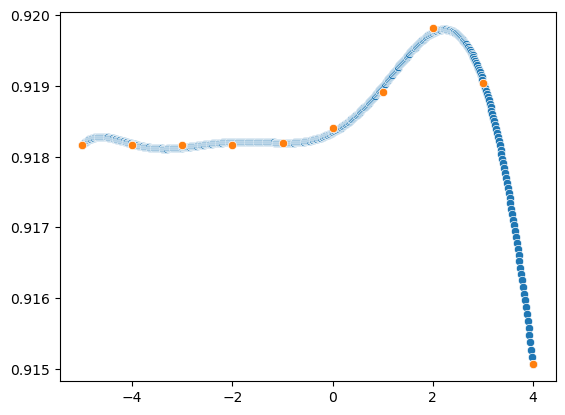

In [68]:
# Convert power_range and the first value of each tuple in ridge_models_results to numpy arrays
x= np.array(list(power_range))
y= np.array([val[0] for val in list(ridge_models_results.values())])

# Fit a polynomial to the data and create a polynomial function
coefficients = np.polyfit(x, y, 7)
p = np.poly1d(coefficients)

# Generate x values for the plot and calculate the corresponding y values
x_plot = np.linspace(min(x), max(x), 500)
y_plot = p(x_plot)

# Find the x value that gives the maximum y value
x_max = x_plot[np.argmax(y_plot)]
print(x_max)

# Plot the polynomial fit and the original data
sns.scatterplot(x=x_plot, y=y_plot)
sns.scatterplot(x=x, y=y)

# Display the plot
plt.show()


In [69]:
%%time
# Run a ridge regression using the optiomal alpha value
ridge_pr = Ridge(alpha=(10**x_max))
ridge_pr.fit(pr_x_train_3rd, y_train)
ridge_pr_y_hat = ridge_pr.predict(pr_x_test_3rd)

print(f'r2 : {r2_score(y_test, ridge_pr_y_hat)}\
\nMAE: {mean_absolute_error(y_test, ridge_pr_y_hat)}\
\nMSE: {mean_squared_error(y_test, ridge_pr_y_hat)}\n')

r2 : 0.9198751780412692
MAE: 1022.6803724123714
MSE: 4131746.1242569257

CPU times: total: 2min 33s
Wall time: 48.3 s


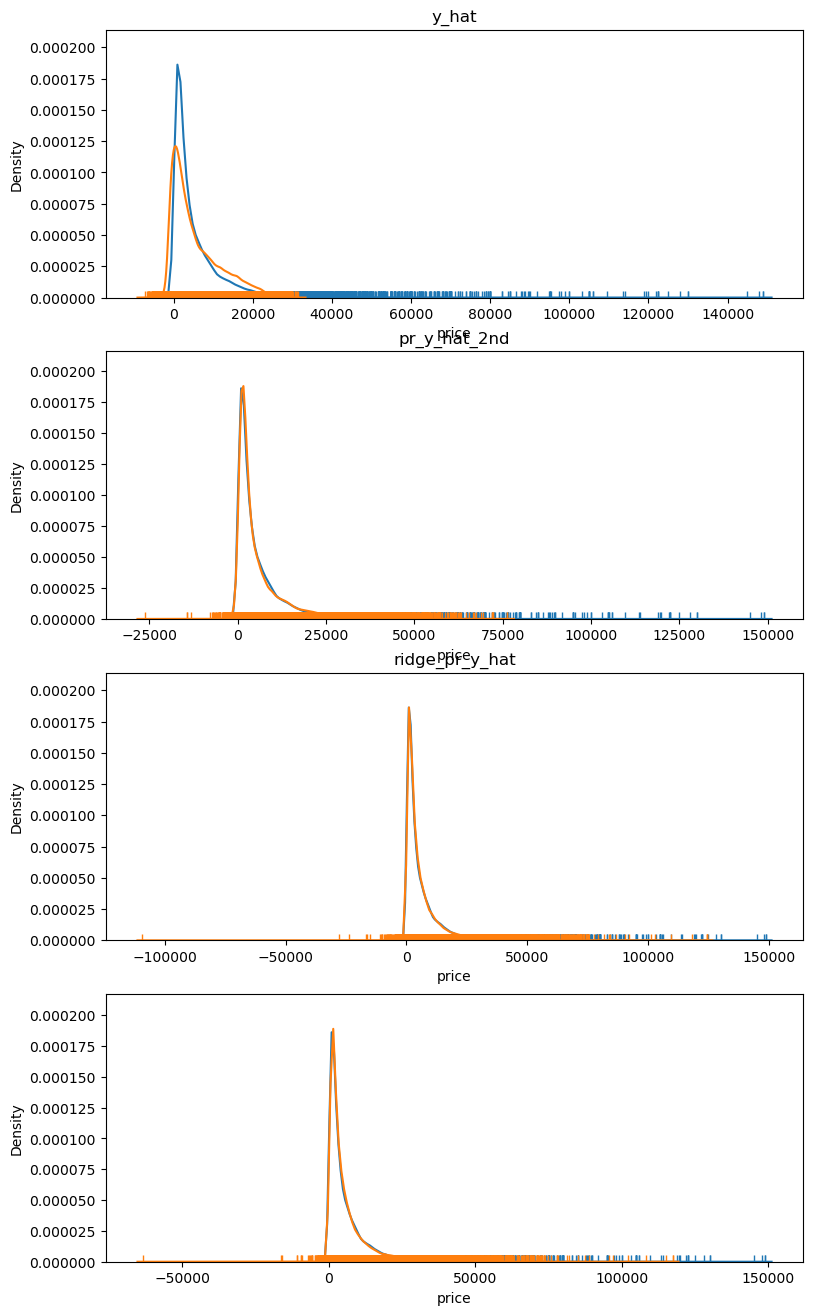

In [71]:
if run_plots:
    fig, axes = plt.subplots(4, 1, figsize=(9, 16))

    sns.distplot(y_test, hist=False, rug=True, ax=axes[0])
    axes[0].set_title("y_train")
    sns.distplot(y_hat, hist=False, rug=True, ax=axes[0])
    axes[0].set_title("y_hat")

    sns.distplot(y_test, hist=False, rug=True, ax=axes[1])
    axes[1].set_title("y_train")
    sns.distplot(pr_y_hat_2nd, hist=False, rug=True, ax=axes[1])
    axes[1].set_title("pr_y_hat_2nd")

    sns.distplot(y_test, hist=False, rug=True, ax=axes[2])
    axes[2].set_title("y_train")
    sns.distplot(pr_y_hat_3rd, hist=False, rug=True, ax=axes[2])
    axes[2].set_title("pr_y_hat_3rd")
    
    sns.distplot(y_test, hist=False, rug=True, ax=axes[3])
    axes[2].set_title("y_train")
    sns.distplot(ridge_pr_y_hat, hist=False, rug=True, ax=axes[3])
    axes[2].set_title("ridge_pr_y_hat")
    
#     axes[0].set_xlim([None, 150000])
#     axes[1].set_xlim([None, 150000])
#     axes[2].set_xlim([None, 150000])
    plt.show()


## Project Completed by:
[Karim Nasr](https://www.linkedin.com/in/karim-nasr-abu-al-fath/)